In [1]:
# Code generated with ChatGPT here: https://chatgpt.com/share/67ee9cf6-61e4-800a-a95c-372a73364432

In [2]:
import requests
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# --- CONFIGURATION ---
# Optionally, add your GitHub token here to increase your rate limit.
# For example: headers = {'Authorization': 'token YOUR_GITHUB_TOKEN'}
headers = {}

# GitHub search API endpoint for repositories
search_url = "https://api.github.com/search/repositories"
query = 'manubot in:readme'  # searches in the README
per_page = 100  # maximum per page
page = 1

In [4]:
# Store repositories
repos = []

# GitHub Search API returns up to 1000 results.
print("Querying GitHub API for repositories referencing manubot/rootstock...")
while True:
    params = {
        'q': query,
        'per_page': per_page,
        'page': page,
    }
    response = requests.get(search_url, headers=headers, params=params)
    if response.status_code != 200:
        print(f"Error: {response.status_code} - {response.text}")
        break

    data = response.json()
    items = data.get('items', [])
    if not items:
        break

    repos.extend(items)
    print(f"Fetched page {page} with {len(items)} repos.")
    
    # GitHub search API stops after 1000 results.
    if page * per_page >= min(data.get('total_count', 0), 1000):
        break

    page += 1
    time.sleep(1)  # be polite and avoid hitting rate limits

Querying GitHub API for repositories referencing manubot/rootstock...
Fetched page 1 with 100 repos.
Fetched page 2 with 100 repos.
Fetched page 3 with 100 repos.
Fetched page 4 with 100 repos.
Fetched page 5 with 100 repos.
Fetched page 6 with 100 repos.
Fetched page 7 with 100 repos.
Fetched page 8 with 8 repos.


In [5]:
print(f"Total repositories found: {len(repos)}")

Total repositories found: 708


In [6]:
# --- PROCESS DATA ---
# Create a DataFrame with key info: name, created_at, language, and full URL.
data = []
for repo in repos:
    data.append({
        'name': repo['full_name'],
        'created_at': pd.to_datetime(repo['created_at']),
        'language': repo['language'] if repo['language'] else "Unknown",
        'url': repo['html_url']
    })

df = pd.DataFrame(data)

In [7]:
df.shape

(708, 4)

In [8]:
df.head()

,name,created_at,language,url
0,greenelab/deep-review,2016-08-02 17:41:56+00:00,HTML,https://github.com/greenelab/deep-review
1,manubot/rootstock,2017-06-29 17:34:03+00:00,HTML,https://github.com/manubot/rootstock
2,manubot/manubot,2017-06-29 15:02:20+00:00,Python,https://github.com/manubot/manubot
3,manubot/try-manubot,2019-03-26 13:15:20+00:00,HTML,https://github.com/manubot/try-manubot
4,greenelab/covid19-review,2020-03-20 09:48:08+00:00,TeX,https://github.com/greenelab/covid19-review


In [21]:
assert df["name"].is_unique
assert df["url"].is_unique

# PLOT USAGE OVER TIME

In [9]:
# --- ANALYZE USAGE OVER TIME ---
# Count new repositories per month.
df['month'] = df['created_at'].dt.to_period('M')
monthly_counts = df.groupby('month').size().reset_index(name='repo_count')
monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()

/tmp/ipykernel_77638/28452212.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['created_at'].dt.to_period('M')


In [10]:
# Compute cumulative count over time
monthly_counts['cumulative'] = monthly_counts['repo_count'].cumsum()

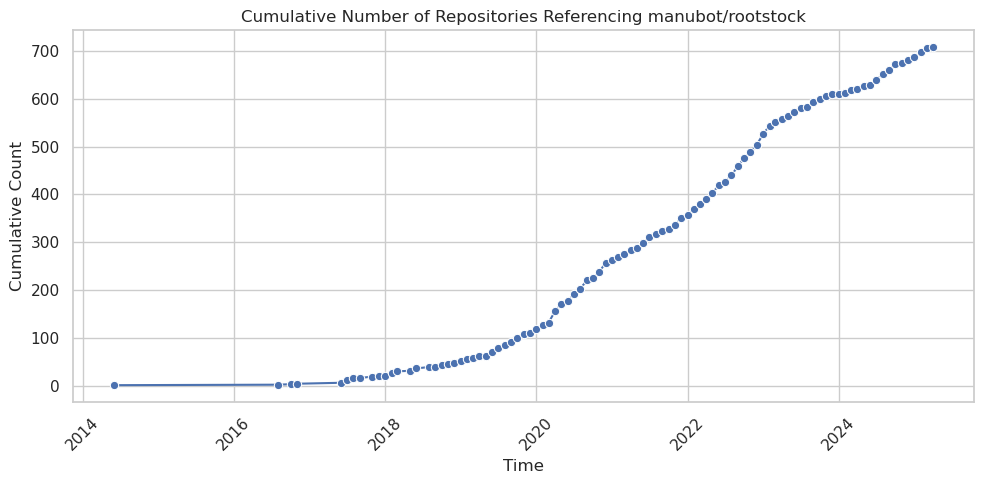

In [11]:
sns.set(style="whitegrid")

# --- PLOT USAGE OVER TIME ---
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='cumulative', data=monthly_counts, marker="o")
plt.title("Cumulative Number of Repositories Referencing manubot/rootstock")
plt.xlabel("Time")
plt.ylabel("Cumulative Count")
plt.xticks(rotation=45)
plt.tight_layout()

# PLOT USAGE OVER TIME (only HTML/TeX)

In [12]:
# --- ANALYZE USAGE OVER TIME ---
# Count new repositories per month.
monthly_counts = df[df["language"].isin(("TeX", "HTML"))].groupby('month').size().reset_index(name='repo_count')
monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()

In [13]:
# Compute cumulative count over time
monthly_counts['cumulative'] = monthly_counts['repo_count'].cumsum()

In [14]:
monthly_counts

,month,repo_count,cumulative
0,2016-08-01,1,1
1,2017-06-01,1,2
2,2017-07-01,3,5
3,2017-08-01,1,6
4,2017-09-01,1,7
...,...,...,...
80,2024-12-01,5,436
81,2025-01-01,6,442
82,2025-02-01,8,450
83,2025-03-01,9,459


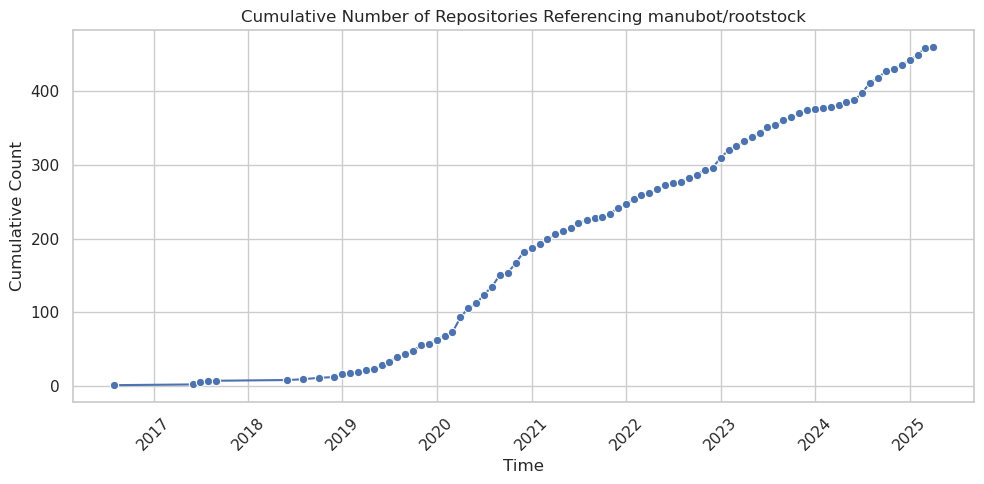

In [15]:
sns.set(style="whitegrid")

# --- PLOT USAGE OVER TIME ---
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='cumulative', data=monthly_counts, marker="o")
plt.title("Cumulative Number of Repositories Referencing manubot/rootstock")
plt.xlabel("Time")
plt.ylabel("Cumulative Count")
plt.xticks(rotation=45)
plt.tight_layout()

# ANALYZE LANGUAGE DISTRIBUTION

In [16]:
language_counts = df['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

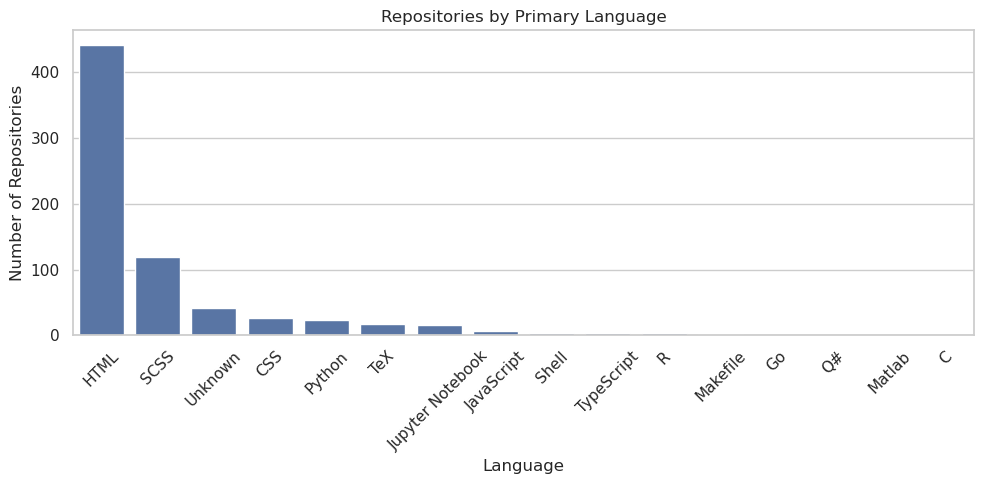

In [17]:
# Plot language distribution as a bar chart.
plt.figure(figsize=(10, 5))
sns.barplot(x='language', y='count', data=language_counts)
plt.title("Repositories by Primary Language")
plt.xlabel("Language")
plt.ylabel("Number of Repositories")
plt.xticks(rotation=45)
plt.tight_layout()

# ADDITIONAL STATISTICS

In [18]:
total_repos = len(df)
first_date = df['created_at'].min().strftime('%Y-%m-%d')
last_date = df['created_at'].max().strftime('%Y-%m-%d')
print(f"Total repositories found: {total_repos}")
print(f"First repository created on: {first_date}")
print(f"Most recent repository created on: {last_date}")
print("\nLanguage distribution:")
print(language_counts)

Total repositories found: 708
First repository created on: 2014-06-22
Most recent repository created on: 2025-04-03

Language distribution:
            language  count
0               HTML    442
1               SCSS    119
2            Unknown     42
3                CSS     27
4             Python     24
5                TeX     18
6   Jupyter Notebook     15
7         JavaScript      6
8              Shell      3
9         TypeScript      3
10                 R      3
11          Makefile      2
12                Go      1
13                Q#      1
14            Matlab      1
15                 C      1
